<a href="https://colab.research.google.com/github/BrouthenKamel/Text-Classification/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing needed modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
data_url = "https://drive.google.com/file/d/1YByxDNQoDFbLIwNtA9nEEDfG7fFB4zjT/view?usp=share_link"
download_link = "https://drive.google.com/uc?export=download&id=1YByxDNQoDFbLIwNtA9nEEDfG7fFB4zjT"
data_path = "/content/text_topics.csv"

In [3]:
data = pd.read_csv(download_link)

### Discovering the dataset

In [4]:
data.head()

,text,date,topics,id
0,Barbara Bailey is the queen of broadcast news ...,2020-09-04,['film_tv_&_video' 'news_&_social_concern'],1301943102094139393
1,start the 20-21 school year off POSITIVE! let’...,2020-09-05,['diaries_&_daily_life' 'youth_&_student_life'],1302275052256342017
2,Worth watching at least the 1st 10mins if I wa...,2020-09-06,['film_tv_&_video' 'news_&_social_concern'],1302450647422259205
3,There s regular people and then there s {@Bail...,2020-09-06,['celebrity_&_pop_culture'],1302452496011595776
4,"Up with new grace, truly sorry on behalf of {@...",2020-09-06,['celebrity_&_pop_culture' 'fitness_&_health' ...,1302479114469867520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1505 non-null   object
 1   date    1505 non-null   object
 2   topics  1505 non-null   object
 3   id      1505 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 47.2+ KB


### Exploring the features

In [6]:
columns = data.columns
columns

Index(['text', 'date', 'topics', 'id'], dtype='object')

In [ ]:
data['topics'].unique()

### Constructing the target vector

In [8]:
labels = []

In [9]:
for label in data['topics'].values:
  label_string = label[1:-1].replace('\n', '')
  #print(label_string)
  label_list = [ category[1:-1] for category in label_string.split() ]
  labels.append(label_list)

In [10]:
len(labels)

1505

In [11]:
frequencies = dict()
for label_list in labels:
  for label in label_list:
    if label not in frequencies.keys():
      frequencies[label] = 1
    else:
      frequencies[label] += 1

In [12]:
frequencies = dict(sorted(frequencies.items(), key=lambda x: x[1], reverse=True))

In [13]:
frequencies

{'sports': 532,
 'music': 362,
 'news_&_social_concern': 289,
 'film_tv_&_video': 231,
 'celebrity_&_pop_culture': 210,
 'diaries_&_daily_life': 135,
 'business_&_entrepreneurs': 80,
 'other_hobbies': 70,
 'science_&_technology': 65,
 'gaming': 56,
 'relationships': 55,
 'fitness_&_health': 44,
 'arts_&_culture': 42,
 'fashion_&_style': 33,
 'family': 30,
 'learning_&_educational': 23,
 'food_&_dining': 22,
 'travel_&_adventure': 14,
 'youth_&_student_life': 11}

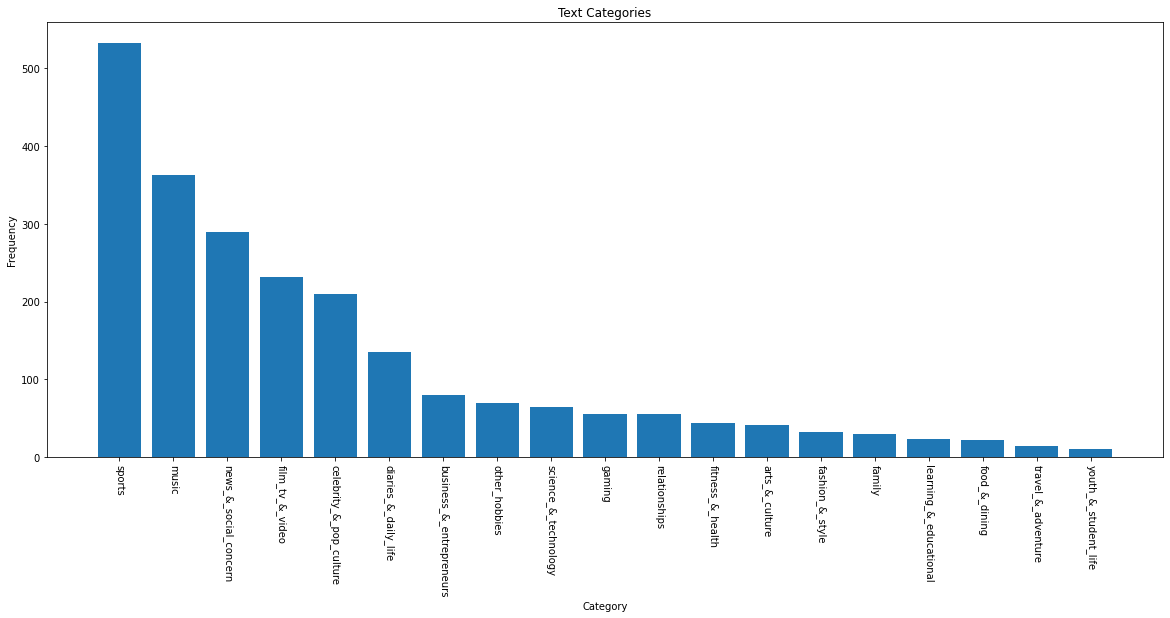

In [14]:
plt.figure(figsize=(20, 8))

plt.bar(frequencies.keys(), frequencies.values(), width=0.8)

plt.title('Text Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.xticks(rotation=-90)

plt.show()

In [15]:
topics_columns = dict()

for category in frequencies.keys():
  topic_column = []
  for data_point in labels:
    if category in data_point:
      topic_column.append(1)
    else:
      topic_column.append(0)
  topics_columns[category] = topic_column

In [16]:
for category in frequencies.keys():
  data[category] = topics_columns[category]

In [17]:
data.columns

Index(['text', 'date', 'topics', 'id', 'sports', 'music',
       'news_&_social_concern', 'film_tv_&_video', 'celebrity_&_pop_culture',
       'diaries_&_daily_life', 'business_&_entrepreneurs', 'other_hobbies',
       'science_&_technology', 'gaming', 'relationships', 'fitness_&_health',
       'arts_&_culture', 'fashion_&_style', 'family', 'learning_&_educational',
       'food_&_dining', 'travel_&_adventure', 'youth_&_student_life'],
      dtype='object')

### The new dataset

In [18]:
dataset = data.drop(columns = ['date', 'topics', 'id'] )

### Feature Engineering

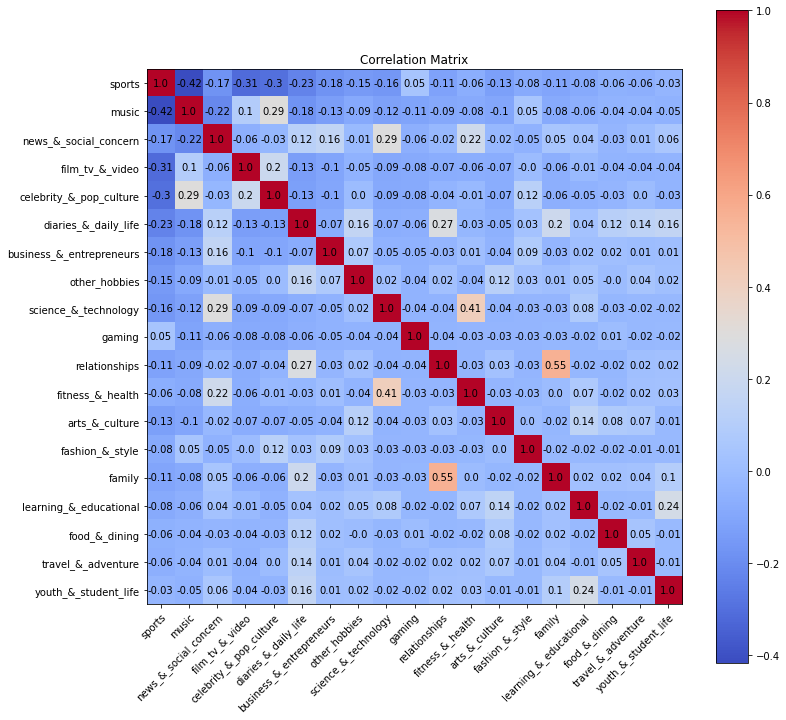

In [21]:
corr_matrix = dataset.corr()

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(corr_matrix, cmap='coolwarm')

cbar = ax.figure.colorbar(im, ax=ax)

ticks = np.arange(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, np.round(corr_matrix.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

ax.set_title("Correlation Matrix")

plt.show()

In [ ]:
for category in corr_matrix.columns:
  print(f"The most correlated categories with {category} : ")
  for other in corr_matrix.drop(columns = [category]).columns:
    if corr_matrix.loc[category, other] > 0.1:
      print(f"-> {other} = {corr_matrix.loc[category, other]:.2f}") 
  print("\n")

In [24]:
categories = dict()
for category in corr_matrix.columns:
  categories[category] = [ 0 for _ in range(len(corr_matrix.columns)) ]

for index, category in enumerate(corr_matrix.columns):
  for datapoint in dataset.drop(columns = ["text"]).values:
    if( datapoint[index] == 1 ):
      for other_index, other_category in enumerate(datapoint):
        if other_category == 1:
          categories[category][other_index] += 1

In [25]:
correlations = pd.DataFrame(categories, index = corr_matrix.columns)

In [27]:
correlations["sports"].drop("sports")

music                        0
news_&_social_concern       53
film_tv_&_video              0
celebrity_&_pop_culture      0
diaries_&_daily_life         0
business_&_entrepreneurs     0
other_hobbies                2
science_&_technology         0
gaming                      26
relationships                4
fitness_&_health             8
arts_&_culture               0
fashion_&_style              3
family                       0
learning_&_educational       1
food_&_dining                3
travel_&_adventure           1
youth_&_student_life         2
Name: sports, dtype: int64

In [ ]:
for category in correlations.columns:
  fig, ax = plt.subplots(figsize = (10, 6))
  x = correlations.columns #.drop(columns = [category])
  y = correlations[category]#.drop(category)

  ax.bar(x, y)

  ax.set_xlabel("Categories")
  ax.set_ylabel("Occurrences")
  ax.set_title(f'Category : {category}')

  plt.xticks(rotation=-90)

  plt.show()

  print("\n")

### Data cleaning

Examinig potential cleaning steps

In [ ]:
dataset['text'].sample(n=10).values.tolist()

In [30]:
import re
import string

Removing Tags 

In [31]:
def remove_tag(text):
    url = re.compile(r"({.*?}|\{\{.*?\}\})")
    return url.sub(r"", text)

In [32]:
dataset['clean_text'] = dataset["text"].apply(remove_tag)

In [ ]:
dataset['clean_text'].sample(n=10).values.tolist()

Removing punctuations

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

In [36]:
dataset['clean_text'] = dataset["clean_text"].apply(remove_punct)

In [37]:
dataset['clean_text'] = dataset['clean_text'].str.replace('[\[\]]', '')

<ipython-input-37-f0fe9302765c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_text'] = dataset['clean_text'].str.replace('[\[\]]', '')


In [38]:
dataset["clean_text"].sample(n=2).values

array(['make it happen  bring the boy Home ',
       'Stay safe everyone   I followed  and I vote LISA of BLACKPINK\xa0for BiggestCrush at TDYAwards  '],
      dtype=object)

Removing stop words

In [39]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [42]:
dataset['reduced_text'] = dataset["clean_text"].apply(remove_stopwords)

In [43]:
dataset["reduced_text"].sample(n=4).values

array(['ok looking good romcom great movie general recommend map tiny perfect things really good job involved loved',
       'part 2 story movie 372021 via',
       'everyone follow twitch close 600 really pog tell said',
       'really love song treatpeoplewithkindness would really cool play today please�d83d�de4f�d83c�dffc'],
      dtype=object)

Keeping only Alphanumerical characters

In [44]:
dataset['clean_text'] = dataset['reduced_text'].str.replace(r'[^a-zA-Z ]', '')

<ipython-input-44-c0916d6bb42c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_text'] = dataset['reduced_text'].str.replace(r'[^a-zA-Z ]', '')


In [45]:
dataset['clean_text'].sample(n=4).values

array(['sunday morning catch cricket indvseng channelcricket brentwood billericay',
       'umusic video wami wokqala lo bafethu please watch subscribe comment share link new music video friends mbzet ndifunawena official music video feat link thank blackcoffee',
       'looking forward battle florida playoffs wow heatingup',
       'found line com colares de zaius garlands jasmine flowers goan portuguese short story reading actually reference'],
      dtype=object)

### Check the vocabulary

In [46]:
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter = counter_word(dataset["clean_text"])

In [47]:
len(counter)

7371

In [48]:
counter.most_common(10)

[('via', 213),
 ('new', 180),
 ('music', 131),
 ('love', 101),
 ('video', 89),
 ('like', 81),
 ('time', 76),
 ('one', 74),
 ('game', 69),
 ('team', 68)]

### Exploring statistical insights

In [49]:
X = dataset["clean_text"]

In [50]:
X

0       barbara bailey queen broadcast news central ea...
1       start  school year positive lets start thread ...
2       worth watching least st mins minister love  of...
3                         regular people queen everything
4       new grace truly sorry behalf dont endorse bad ...
                              ...                        
1500                 like jamescorden someone help figure
1501    hats team field tracking hurricaneida keeping ...
1502    truth love realeven everyone gangs yougod isnt...
1503    hmu quality assured results essay due pay writ...
1504    thinking everyone idas path friends please sta...
Name: clean_text, Length: 1505, dtype: object

In [51]:
y = dataset.drop(columns = ['reduced_text', 'clean_text', 'text'])

In [52]:
y

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1501,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1503,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [53]:
category_frequency = y.sum(axis=0)

In [54]:
category_frequency[category_frequency > 200].index

Index(['sports', 'music', 'news_&_social_concern', 'film_tv_&_video',
       'celebrity_&_pop_culture'],
      dtype='object')

In [55]:
high_freq_columns = ['sports', 'music', 'news_&_social_concern', 'film_tv_&_video',
       'celebrity_&_pop_culture']

In [56]:
y_high_freq = y[high_freq_columns]

In [57]:
y_high_freq

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture
0,0,0,1,1,0
1,0,0,0,0,0
2,0,0,1,1,0
3,0,0,0,0,1
4,0,0,1,0,1
...,...,...,...,...,...
1500,0,0,0,0,1
1501,0,0,1,1,1
1502,0,0,0,0,0
1503,0,0,0,0,0


### Splittng the dataset

In [58]:
pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split

In [60]:
X_reshaped= X.values.reshape(-1, 1)
X_reshaped.shape

(1505, 1)

In [61]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X_reshaped, y.values, test_size = 0.2)

In [ ]:
y_fractions = y_test.sum(axis=0) / y.sum(axis=0)
print(y_fractions)

In [63]:
y_test_df = pd.DataFrame(y_test, columns = y.columns)

In [64]:
y_train_df = pd.DataFrame(y_train, columns = y.columns)

In [ ]:
y_train_df[y_train_df["travel_&_adventure"] == 1]#.sample(n=5)

In [ ]:
y_test_df[y_test_df["travel_&_adventure"] == 1].sum(axis = 0)

In [ ]:
y_train_df.sum(axis=0)

In [68]:
subset = y_train_df[y_train_df["travel_&_adventure"] == 1].sample(frac=0.15, random_state=42)

In [69]:
subset

,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
1198,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1019,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [70]:
y_test_df = pd.concat([y_test_df, subset], ignore_index=True)

In [71]:
y_train_df = y_train_df.drop(subset.index)

In [72]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

In [73]:
subset.index

Int64Index([1198, 1019], dtype='int64')

In [74]:
X_train_df.iloc[list(subset.index)]

,0
1198,tad embarrassed say hadnt yet s city center wo...
1019,lately every time step foot flight wonder fly ...


In [75]:
X_test_df = pd.concat([X_test_df, X_train_df.iloc[list(subset.index)]], ignore_index = True)

In [76]:
X_train_df = X_train_df.drop(subset.index)

In [77]:
X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape

((1206, 1), (299, 1), (1206, 19), (299, 19))

In [78]:
y_train = y_train_df
y_test = y_test_df
X_train = X_train_df.values
X_test = X_test_df.values

In [ ]:
y_fractions = y_test.sum(axis=0) / y.sum(axis=0)
print(y_fractions)

In [80]:
y_train_df['travel_&_adventure'].sum(axis=0), y_test_df['travel_&_adventure'].sum(axis=0)

(11, 3)

### Tokenization

In [ ]:
num_words = len(counter)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train.flatten().tolist()) # fit only to training

In [ ]:
tokenizer.word_index

In [ ]:
X_train_tokens = tokenizer.texts_to_sequences(X_train.flatten().tolist())
X_test_tokens = tokenizer.texts_to_sequences(X_test.flatten().tolist())

In [ ]:
word_lenghts = dict()

for text in X:
  if len(text) not in word_lenghts.keys():
    word_lenghts[str(len(text))] = 1
  else:
    word_lenghts[str(len(text))] += 1

In [ ]:
lengths = list(map(lambda x: int(x),list(word_lenghts.keys()) ))     

In [ ]:
maximum_word_length = max(lengths)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_vector_length = maximum_word_length

X_train_padded = pad_sequences(X_train_tokens, maxlen=input_vector_length, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_tokens, maxlen=input_vector_length, padding="post", truncating="post")

In [ ]:
X_train_padded.shape, X_test_padded.shape

((1206, 233), (299, 233))

### Building a base model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SimpleRNN

Two Models for testing

In [ ]:
# Complex one
model = Sequential([
    Embedding(num_words, 92, input_length=input_vector_length),
    LSTM(64, activation='relu', dropout=0.1),
    Dense(32, activation='relu'),
    Dense(24, activation='relu'),
    Dense(y_train.shape[1], activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 233, 92)           678132    
                                                                 
 lstm (LSTM)                 (None, 64)                40192     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 19)                475       
                                                                 
Total params: 721,671
Trainable params: 721,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics = ['accuracy'])

In [ ]:
model.evaluate(X_train_padded, y_train)

38/38 [==============================] - 5s 34ms/step - loss: 0.6929 - accuracy: 0.0174


[0.6929388046264648, 0.017412934452295303]

In [ ]:
model.evaluate(X_test_padded, y_test)

10/10 [==============================] - 0s 35ms/step - loss: 0.6929 - accuracy: 0.0167


[0.6929454207420349, 0.016722407191991806]

In [ ]:
history = model.fit(X_train_padded, y_train, epochs=10)

Epoch 1/10
38/38 [==============================] - 26s 615ms/step - loss: 1022958784.0000 - accuracy: 0.2595
Epoch 2/10
38/38 [==============================] - 21s 556ms/step - loss: 0.4722 - accuracy: 0.1808
Epoch 3/10
38/38 [==============================] - 22s 572ms/step - loss: 0.4343 - accuracy: 0.0066
Epoch 4/10
38/38 [==============================] - 19s 499ms/step - loss: 0.4037 - accuracy: 0.0083
Epoch 5/10
38/38 [==============================] - 21s 555ms/step - loss: 0.3792 - accuracy: 0.2355
Epoch 6/10
38/38 [==============================] - 18s 473ms/step - loss: 0.3600 - accuracy: 0.2405
Epoch 7/10
38/38 [==============================] - 20s 516ms/step - loss: 0.3446 - accuracy: 0.2405
Epoch 8/10
38/38 [==============================] - 18s 482ms/step - loss: 0.3321 - accuracy: 0.2405
Epoch 9/10
38/38 [==============================] - 21s 548ms/step - loss: 0.3214 - accuracy: 0.2405
Epoch 10/10
38/38 [==============================] - 18s 487ms/step - loss: 0.3124

### Evaluation

In [ ]:
model.evaluate(X_test_padded, y_test)

10/10 [==============================] - 1s 33ms/step - loss: 0.3113 - accuracy: 0.2408


[0.3112863004207611, 0.24080267548561096]

In [ ]:
prediction_probas = model.predict(X_test_padded)

10/10 [==============================] - 0s 31ms/step


### Setting evaluation metric

In [81]:
def metrics(y_test, predictions):
  accuracies = dict()
  recalls = dict()
  precisions = dict()
  f1_scores = dict()
  for columns_index in range(y_test.shape[1]):
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0
    for data_point_index in range(y_test.shape[0]):
      if(y_test.values[data_point_index][columns_index] == 1 and predictions[data_point_index][columns_index] == 1):
        true_positives += 1
      if(y_test.values[data_point_index][columns_index] == 0 and predictions[data_point_index][columns_index] == 0):
        true_negatives += 1
      if(y_test.values[data_point_index][columns_index] == 1 and predictions[data_point_index][columns_index] == 0):
        false_negatives += 1
      if(y_test.values[data_point_index][columns_index] == 0 and predictions[data_point_index][columns_index] == 1):
        false_positives += 1
    accuracies[y_test.columns[columns_index]] = (true_positives + true_negatives) / y_test.shape[0]
    if (true_positives + false_negatives) == 0:
      recalls[y_test.columns[columns_index]] = 0
    else:
      recalls[y_test.columns[columns_index]] = true_positives / (true_positives + false_negatives)
    if (true_positives + false_positives) == 0:
      precisions[y_test.columns[columns_index]] = 0
    else:
      precisions[y_test.columns[columns_index]] = true_positives / (true_positives + false_positives)
    if ( recalls[y_test.columns[columns_index]] + precisions[y_test.columns[columns_index]] ) != 0:
      f1_scores[y_test.columns[columns_index]] = 2 * ( recalls[y_test.columns[columns_index]] * precisions[y_test.columns[columns_index]] ) / ( recalls[y_test.columns[columns_index]] + precisions[y_test.columns[columns_index]] )
    else:
      f1_scores[y_test.columns[columns_index]] = 0
  return accuracies, recalls, precisions, f1_scores

In [82]:
def get_predictions(prediction_probas, threshold):
  predictions = []

  for probas in prediction_probas:
    prediction = []
    for proba in probas:
      if proba > threshold:
        prediction.append(1)
      else:
        prediction.append(0)
    predictions.append(prediction)
  return predictions

In [ ]:
predictions = get_predictions(prediction_probas, 0.2)
accuracies, recalls, precisions, f1_scores = metrics(y_test_df, predictions)

In [ ]:
for column in y_test_df.columns:
  print(f"{column} Evaluation :\n-> accuracy = {accuracies[column]:.2f} \n-> recall = {recalls[column]:.2f} \n-> precision = {precisions[column]:.2f} \n-> f1_scores = {f1_scores[column]:.2f}\n")

Basic models didn't work

### Trying a Large Language Model : BERT

In [ ]:
!pip install transformers

In [84]:
import tensorflow as tf
import transformers

tokenizer = transformers.AutoTokenizer.from_pretrained('bert-base-uncased')

model = transformers.TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=y.shape[1])

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [85]:
batch_size = 64
learning_rate = 1e-4
num_epochs = 30
callback_threshold = 0.1

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [86]:
train_texts = X_train.flatten().tolist()
train_labels = y_train
train_encodings = tokenizer(train_texts, truncation=True, padding=True)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels)).shuffle(len(train_labels)).batch(batch_size)

In [87]:
from keras.callbacks import Callback

class LossCallback(Callback):
    def __init__(self, threshold):
        super(LossCallback, self).__init__()
        self.threshold = threshold
        self.best_loss = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss < ( self.best_loss ):
            self.best_loss = current_loss
        elif current_loss > (self.best_loss + self.threshold):
            self.model.stop_training = True
            print(f'\nStopping training due to lack of loss increase (epoch {epoch})')

In [ ]:
model.fit(train_dataset, epochs=num_epochs , callbacks=[LossCallback(callback_threshold)])

In [ ]:
model.save_pretrained('/content/model')
tokenizer.save_pretrained('/content/tokenizer')

In [90]:
thresholds = []

for trained_label_size in y_train_df.sum(axis=0):
  thresholds.append( ((trained_label_size // 100) + 1) / 10 )

np.array(thresholds)

array([0.5, 0.3, 0.3, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [91]:
test_texts = X_test.flatten().tolist()
test_labels = y_test
test_encodings = tokenizer(test_texts, truncation=True, padding=True)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels)).batch(batch_size)
test_outputs = model.predict(test_dataset)

5/5 [==============================] - 4s 188ms/step


In [92]:
prediction_probas = tf.math.sigmoid(test_outputs.logits).numpy()

In [93]:
def get_dynamic_predictions(prediction_probas, thresholds):
  predictions = []

  for probas in prediction_probas:
    prediction = []
    for columns_index, proba in enumerate(probas):
      if proba > thresholds[index]:
        prediction.append(1)
      else:
        prediction.append(0)
    predictions.append(prediction)
  return predictions

In [94]:
predictions = get_dynamic_predictions(prediction_probas, thresholds)

In [95]:
accuracies, recalls, precisions, f1_scores = metrics(y_test_df, predictions)

In [ ]:
#\n-> accuracy = {accuracies[column]:.2f}
for column in y_test_df.columns:
  print(f"{column} : --> f1_scores = {f1_scores[column]:.2f} \n---[ recall = {recalls[column]:.2f} \n---[ precision = {precisions[column]:.2f} \n")

In [97]:
trained_label_size = y_train_df.sum(axis=0)

In [101]:
f1_scores_list = f1_scores.values()

In [104]:
f1_scores_rounded = [round(f1_score, 2) for f1_score in f1_scores_list]

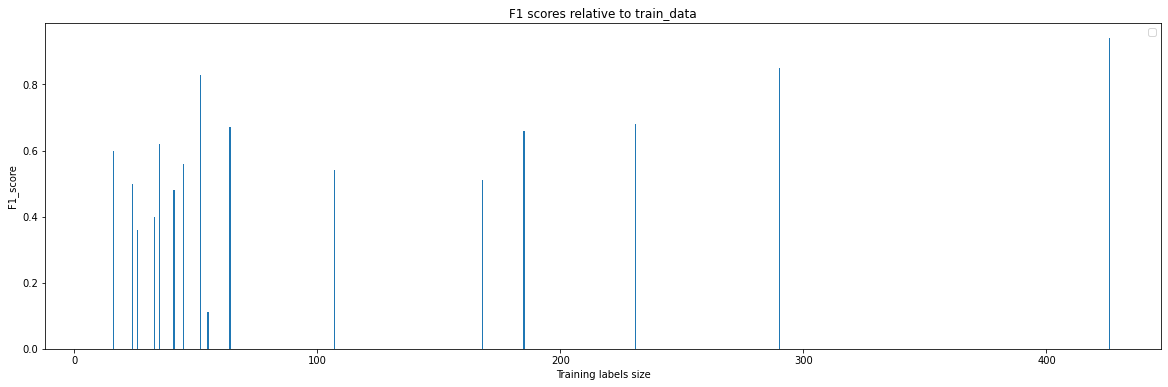

In [105]:
fig = plt.figure(figsize=(20, 6))

plt.bar(trained_label_size, f1_scores_rounded, width=0.5)
plt.xlabel('Training labels size')
plt.ylabel('F1_score')
plt.title('F1 scores relative to train_data')
plt.legend()

plt.show()

### Visualize performance

<ipython-input-115-46db45801b29>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x ,rotation=-90)


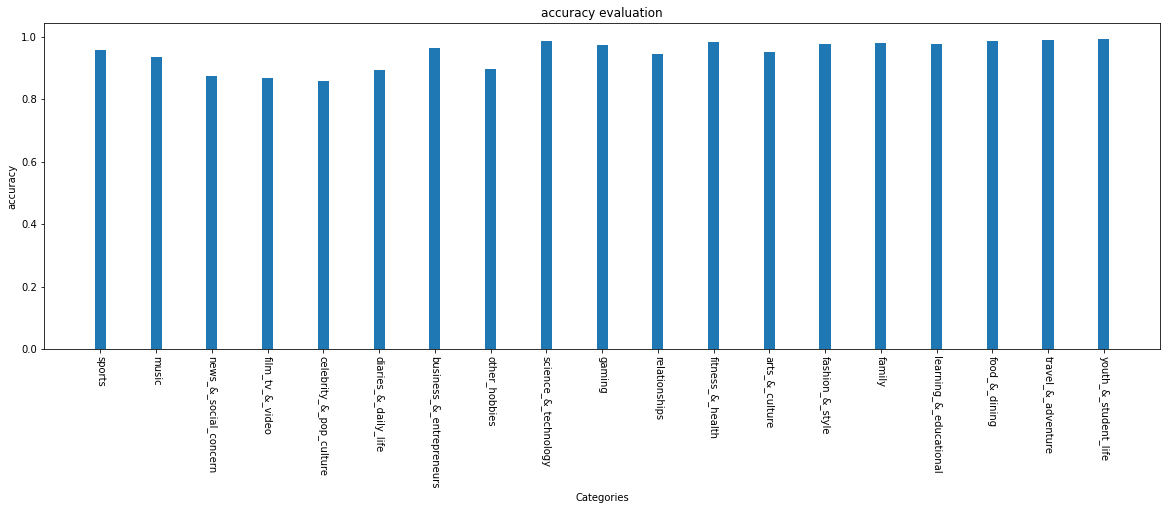

<ipython-input-115-46db45801b29>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x ,rotation=-90)


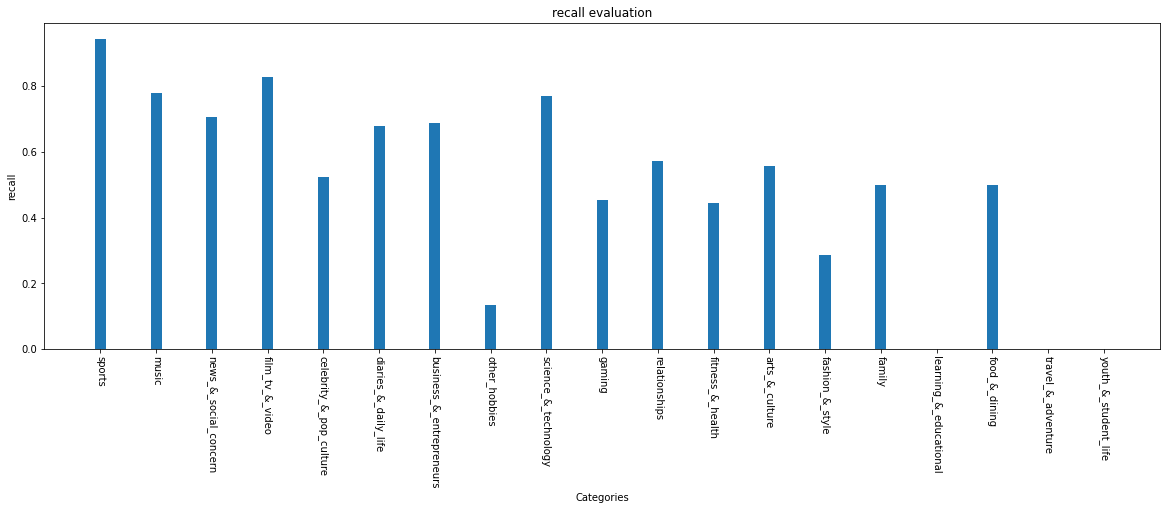

<ipython-input-115-46db45801b29>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x ,rotation=-90)


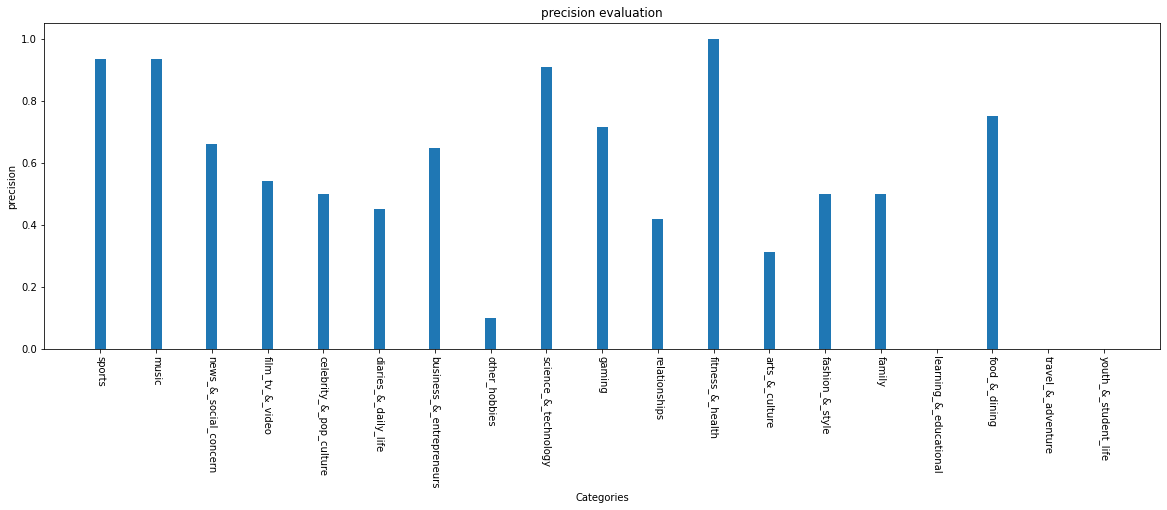

<ipython-input-115-46db45801b29>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x ,rotation=-90)


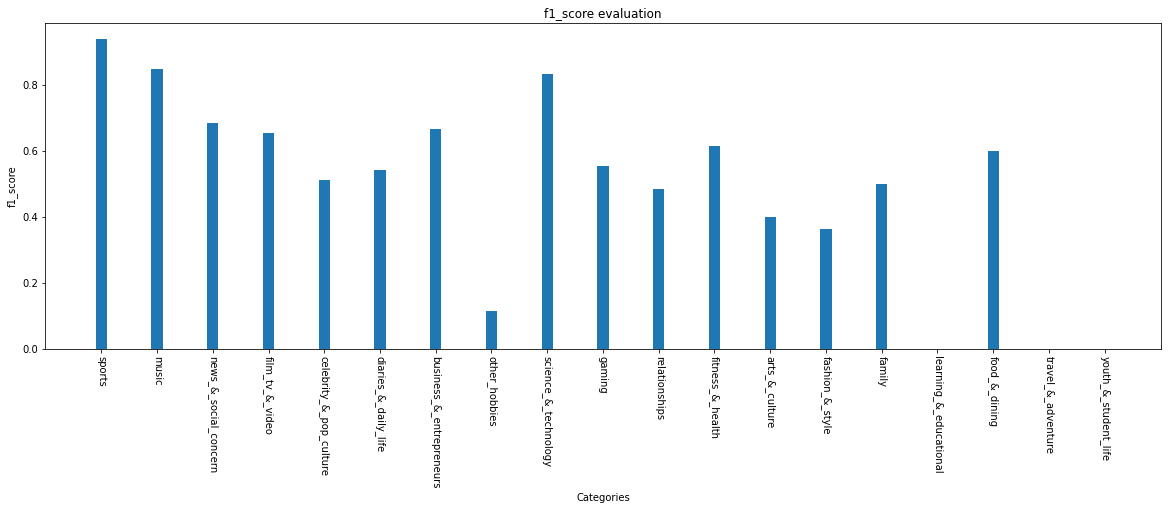

In [115]:
metric_names = ['accuracy', 'recall', 'precision', 'f1_score']
metric_values = [accuracies, recalls, precisions, f1_scores]

bar_width = 0.2
spacing = 0.05

for index, metric_name in enumerate(metric_names):
  fig, ax = plt.subplots(figsize=(20, 6))

  x = y_test_df.columns
  y = metric_values[index].values()

  ax.bar(x, y, width=0.2)

  plt.xlabel("Categories")
  plt.ylabel(metric_name)
  plt.title(metric_name+" evaluation")
  ax.set_xticklabels(x ,rotation=-90)

  plt.show()